# 📊 Titanic Dataset: Описательная статистика

Базовый анализ датасета Titanic: описательная статистика, визуализация распределений, пропуски и категории.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
print("\n--- Общая информация ---")
df.info()


--- Общая информация ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df.describe(include='all') #Дает основные статистики по числовым колонкам: среднее, стандартное отклонение, минимум, квартиль и максимум + включает категориальные признаки (например, пол, порт посадки и т.д.).

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [43]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

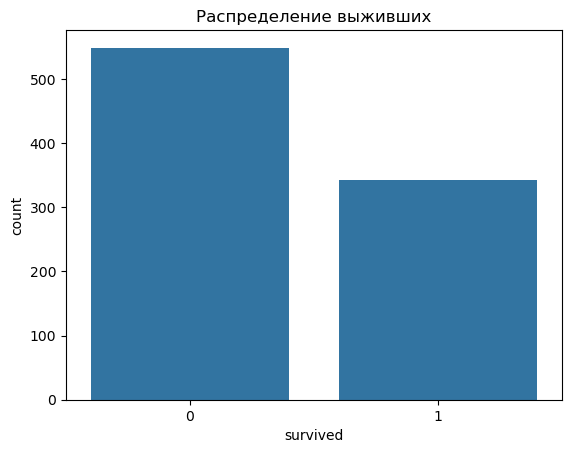

In [44]:
sns.countplot(data=df, x='survived')
plt.title("Распределение выживших")
plt.show()


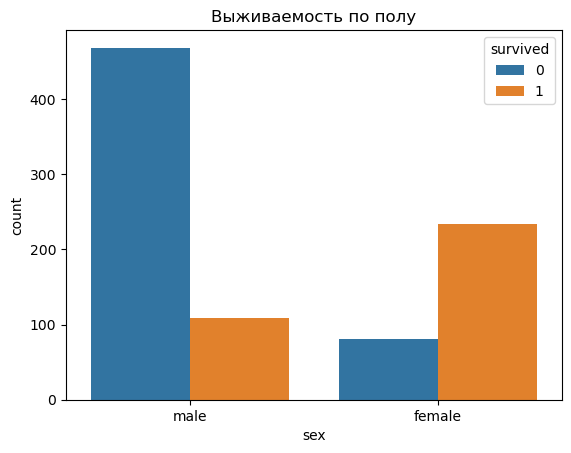

In [45]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Выживаемость по полу")
plt.show()


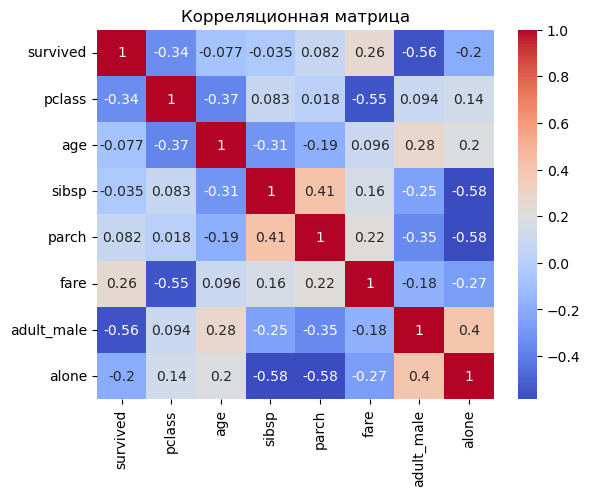

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()


- **+1** — сильная прямая корреляция (при увеличении одного признака увеличивается и другой);
- **-1** — сильная обратная корреляция (при увеличении одного признака другой уменьшается);
- **0** — отсутствие линейной связи.


| Признак       | Корреляция с `survived` | Интерпретация |
|---------------|--------------------------|----------------|
| `adult_male`  | **-0.56** | Взрослые мужчины выживали значительно реже. Это объясняется политикой "женщины и дети — первыми". |
| `pclass`      | **-0.34** | Пассажиры 1 класса выживали чаще, чем из 2 или 3 класса. |
| `fare`        | **+0.26** | Более дорогие билеты (чаще у 1 класса) коррелируют с более высокой выживаемостью. |
| `alone`       | **-0.20** | Люди, путешествующие в одиночку, выживали реже. |
| `age`         | -0.077 | Почти отсутствует корреляция между возрастом и выживанием. |
| `sibsp` / `parch` | около 0 | Количество родственников на борту слабо влияет на выживаемость. |


In [47]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7972027972027972

Confusion Matrix:
[[73  7]
 [22 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



Модель верно делает прогноз примерно в 80% случаев, что для простой модели более чем хорошо